In [3]:
from src.utility.utility_mdf import get_data_from_file
from src.utility.utility_kepler_flare import kepler_flare
from src.utility.utility_light_curve import get_data_training_from_file
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import zscore

/Users/thanapolphungtua-eng/source_code/VENV/thesis_sourcecode/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


58761.46034565975 9587.514999748775


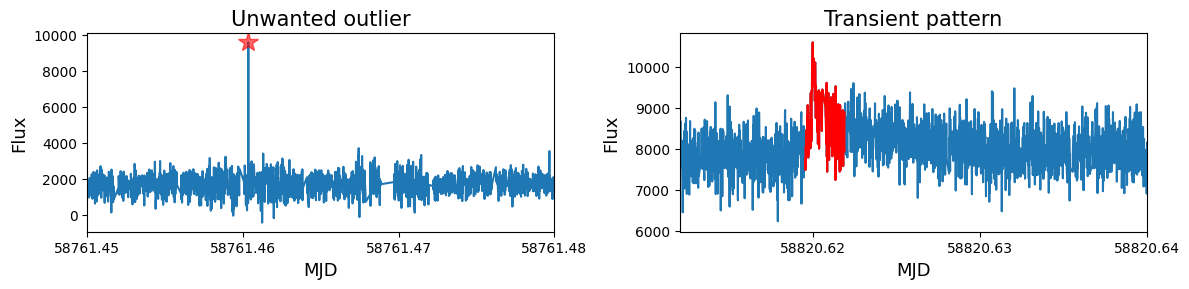

In [4]:
# outlier
outlier_file = 'light_curve_Gaia-DR2_2190058421855697536_date20191005'
outlier_lc = get_data_from_file(outlier_file)
outlier_timestamp = np.argmax(outlier_lc['instances'])

flare_file = 'light_curve_Gaia-DR2_3410076150374417408_date20191203'
flare_lc = get_data_from_file(flare_file)
start_flare_idx = 1110
end_flare_idx = 1300

fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(outlier_lc['timestamps'],outlier_lc['instances'])
axes[0].set_title('Unwanted outlier', fontsize=15)
axes[0].set_xlabel('MJD', fontsize=13)
axes[0].set_ylabel('Flux', fontsize=13)
axes[0].set_xlim([58761.45, 58761.48])
print(outlier_lc['timestamps'][outlier_timestamp], outlier_lc['instances'][outlier_timestamp])
axes[0].plot(outlier_lc['timestamps'][outlier_timestamp], outlier_lc['instances'][outlier_timestamp], 'r*', markersize=15, alpha = 0.6)
axes[0].xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(0.01))

axes[1].plot(flare_lc['timestamps'],flare_lc['instances'])
axes[1].plot(flare_lc['timestamps'][start_flare_idx:end_flare_idx],flare_lc['instances'][start_flare_idx:end_flare_idx], color='red')
axes[1].set_title('Transient pattern', fontsize=15)
axes[1].set_xlabel('MJD', fontsize=13)
axes[1].set_ylabel('Flux', fontsize=13)
axes[1].set_xlim([58820.612, 58820.64])
axes[1].xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.tight_layout()
plt.show()

## Figure 3.3

(800.0, 1200.0)

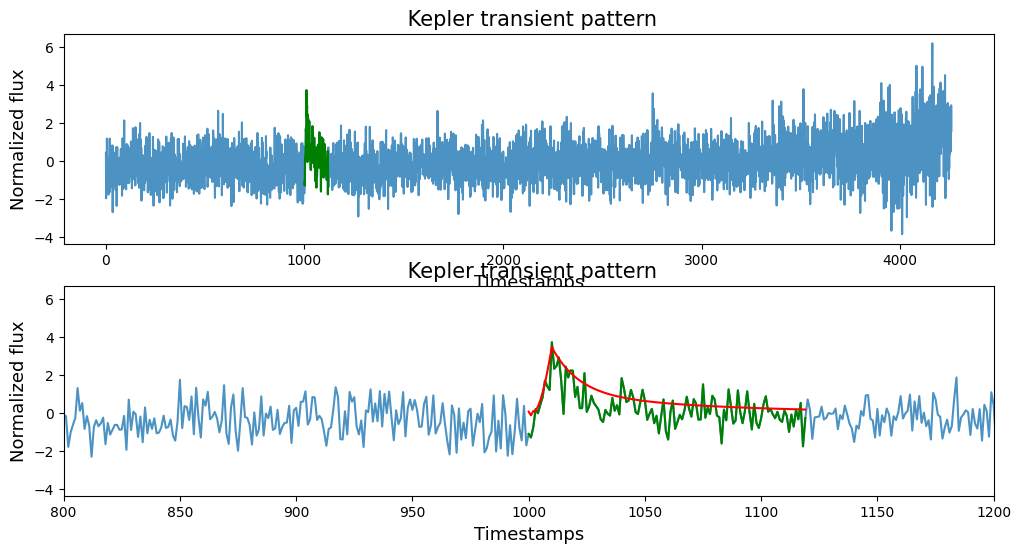

In [5]:
lc_name = '41242954059503360'
time_rise = 1
time_decay = 6
duration_rise=10
duration_decay=110

raw_data = get_data_training_from_file(file_name=lc_name)
flare_timestamps, flare_model = kepler_flare(time_rise=time_rise, time_decay=time_decay,
                                               duration_rise=duration_rise,
                                               duration_decay=duration_decay)

ts = raw_data['instances']
ts1 = zscore(ts)
sigma = np.std(ts1)
flare_flux3 = list(np.array(flare_model) * (3.5 * sigma))
time_start = 1000


for index, flux in enumerate(flare_flux3):
    ts1[time_start + index] = ts1[time_start + index] + flare_flux3[index]

fig, axes = plt.subplots(2, 1, figsize=(12, 6))
axes = axes.flatten()
axes[0].plot(ts1, alpha=0.8)
axes[0].plot(range(time_start,time_start+len(flare_flux3)), ts1[time_start:time_start+len(flare_flux3)], 'green')
axes[0].set_xlabel('Timestamps', fontsize=13)
axes[0].set_ylabel('Normalized flux', fontsize=13)
axes[0].set_title(' Kepler transient pattern', fontsize=15)


axes[1].plot(ts1, alpha=0.8)
axes[1].plot(range(time_start,time_start+len(flare_flux3)), ts1[time_start:time_start+len(flare_flux3)], 'green')
axes[1].plot(range(time_start,time_start+len(flare_flux3)), flare_flux3, 'red')
axes[1].set_xlabel('Timestamps', fontsize=13)
axes[1].set_ylabel('Normalized flux', fontsize=13)
axes[1].set_title(' Kepler transient pattern', fontsize=15)
axes[1].set_xlim(time_start-200,time_start+200)
